# Task:  Build a Transfer Learning model to detect face masks on humans.

Classes to be detected:

• "with_mask"

• "without_mask"

• "mask_worn_incorrect"

In [1]:
import ssl

import keras
import matplotlib.pyplot as plt
import numpy as np

# Task A

## 1. Load the Image Training and Test Datasets from the train and test folder respectively. Each image is of shape 128 x 128 x 3

In [2]:
train_data_generator = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True, vertical_flip = True, zoom_range = 0.1,
    shear_range = 0.1, width_shift_range = 0.2, height_shift_range = 0.2, rotation_range = 90
)
test_data_generator = keras.preprocessing.image.ImageDataGenerator()

## 2. Load training dataset using Keras ImageDataGenerator with validation_split=0.2  

In [3]:
train_data = train_data_generator.flow_from_directory("./face_mask_detection_dataset/train",
                                                      target_size=(128,128), batch_size=1, shuffle=True)

Found 8082 images belonging to 3 classes.


## 3. Load test dataset using Keras ImageDataGenerator 

In [4]:
test_data = test_data_generator.flow_from_directory("./face_mask_detection_dataset/test",
                                                    target_size=(128,128), batch_size=1, shuffle=True)

Found 900 images belonging to 3 classes.


In [5]:
# Create extra function to transform data format and speed up learning process
def get_array_from_datagen(train_generator):
    x=[]
    y=[]
    train_generator.reset()
    for i in range(train_generator.__len__()):
        a, b = train_generator.next()
        x.append(a)
        y.append(b)
    x = np.array(x, dtype=np.float32)
    y = np.array(y, dtype=np.float32)
    print(x.shape)
    print(y.shape)
    return x, y

In [6]:
X_train, y_train = get_array_from_datagen(train_data)
X_test, y_test = get_array_from_datagen(test_data)

(8082, 1, 128, 128, 3)
(8082, 1, 3)
(900, 1, 128, 128, 3)
(900, 1, 3)


In [7]:
X_train = X_train.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)
y_train = y_train.reshape(-1, 3)
y_test = y_test.reshape(-1, 3)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8082, 128, 128, 3)
(900, 128, 128, 3)
(8082, 3)
(900, 3)


## 4. Build a Transfer Learning network using Keras with the following layers

### 4.1. Load EfficientNetB0 as first layers using Keras API.

### 4.2. GLobalAveragePooling2D layer

### 4.3. Dropout(0.2)

### 4.4. Dense layer with 3 neurons and activation softmax

In [8]:
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
base_model = keras.applications.EfficientNetB0(include_top=False)

In [10]:
efficient_net_model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='softmax')
])

In [11]:
efficient_net_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 4053414 (15.46 MB)
Trainable params: 4011391 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


## 5. Compile the model with adam optimizer, categorical_crossentropy loss and with metrics accuracy.

In [12]:
efficient_net_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 6. Train the model for 25 epochs with callbacks Reduce Learning Rate on Plateau and early stopping while monitoring validation loss

In [13]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    verbose=0,
    min_lr=0.00001
)

In [14]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, verbose=1)

In [15]:
history = efficient_net_model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs=3,
    callbacks=[learning_rate_reduction, early_stopping]
)

Epoch 1/3
253/253 [==============================] - 180s 693ms/step - loss: 0.1884 - accuracy: 0.9316 - val_loss: 0.1760 - val_accuracy: 0.9556 - lr: 0.0010
Epoch 2/3
253/253 [==============================] - 234s 927ms/step - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0524 - val_accuracy: 0.9856 - lr: 0.0010
Epoch 3/3
253/253 [==============================] - 257s 1s/step - loss: 0.0626 - accuracy: 0.9796 - val_loss: 0.1782 - val_accuracy: 0.9522 - lr: 0.0010


## 7. Plot training and validation accuracy and loss against epochs

In [16]:
def plot_history(history):
    # visualize history of accuracy during training
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # visualize history of loss during training
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

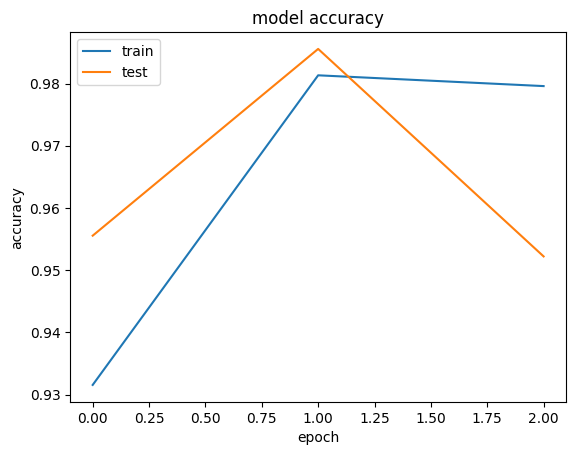

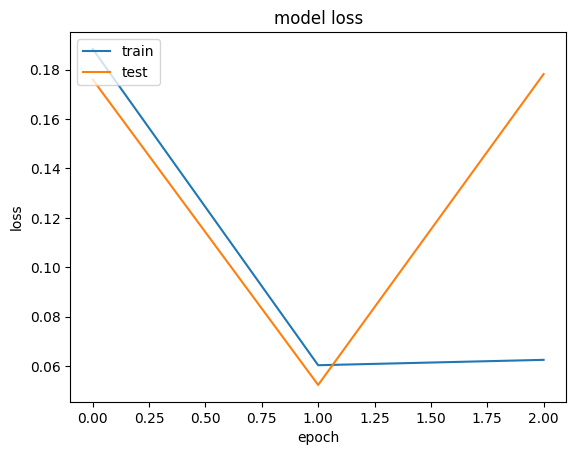

In [17]:
plot_history(history)

# Task B

## 1. Load the Image Training and Test Datasets from the train and test folder respectively. Each image is of shape 128 x 128 x 3

## 2. Load training dataset using Keras ImageDataGenerator with validation_split=0.2

## 3. Load test dataset using Keras ImageDataGenerator

## 4. Build a Transfer Learning network using Keras with the following layers

### 4.1. Load ResNet50 as first layers using Keras API.

### 4.2. GLobalAveragePooling2D layer

### 4.3. Dropout(0.5)

### 4.4. Dense layer with 3 neurons and activation softmax

In [21]:
base_model_resnet = keras.applications.ResNet50(include_top=False)
resnet_model = keras.Sequential([
    base_model_resnet,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='softmax')
])

94765736/94765736 [==============================] - 3s 0us/step


## 5. Compile the model with adam optimizer, categorical_crossentropy loss and with metrics accuracy.

In [22]:
resnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 6. Train the model for 25 epochs with callbacks Reduce Learning Rate on Plateau and early stopping while monitoring validation loss

In [23]:
history = resnet_model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs=3,
    callbacks=[learning_rate_reduction, early_stopping]
)

Epoch 1/3
253/253 [==============================] - 528s 2s/step - loss: 0.4887 - accuracy: 0.8410 - val_loss: 0.2539 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 2/3
253/253 [==============================] - 563s 2s/step - loss: 0.2193 - accuracy: 0.9223 - val_loss: 1.0400 - val_accuracy: 0.6956 - lr: 0.0010
Epoch 3/3
253/253 [==============================] - 819s 3s/step - loss: 0.1542 - accuracy: 0.9487 - val_loss: 1.7330 - val_accuracy: 0.5933 - lr: 0.0010


## 7. Plot training and validation accuracy and loss against epochs

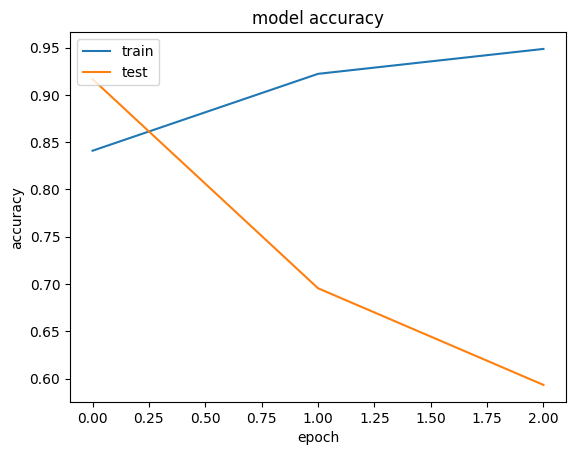

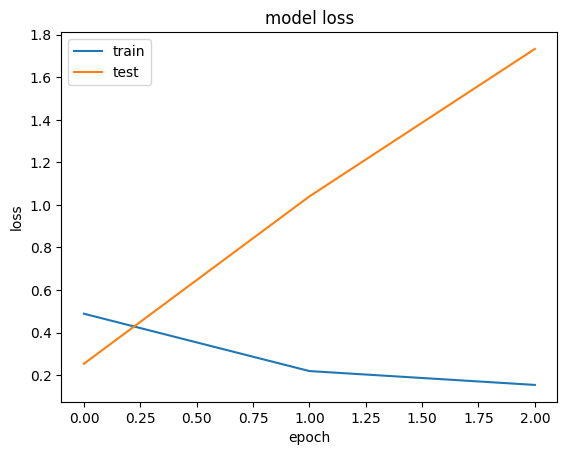

In [24]:
plot_history(history)

# Task C

## 1. Compare EfficientNetB0 and ResNet50 model performance and find the best model

In [25]:
loss, accuracy = efficient_net_model.evaluate(X_test, y_test, batch_size=10)
print("Loss", loss)
print("Accuracy", accuracy)

90/90 [==============================] - 5s 57ms/step - loss: 0.1782 - accuracy: 0.9522
Loss 0.1782108098268509
Accuracy 0.9522222280502319


In [26]:
loss, accuracy = resnet_model.evaluate(X_test, y_test, batch_size=10)
print("Loss", loss)
print("Accuracy", accuracy)

90/90 [==============================] - 13s 143ms/step - loss: 1.7330 - accuracy: 0.5933
Loss 1.7330228090286255
Accuracy 0.5933333039283752


In [27]:
from sklearn.metrics import classification_report

report_efficient_net = classification_report(y_test.argmax(axis=1), efficient_net_model.predict(X_test).argmax(axis=1))
report_res_net = classification_report(y_test.argmax(axis=1), resnet_model.predict(X_test).argmax(axis=1))

29/29 [==============================] - 13s 420ms/step


In [29]:
print("EfficientNet Model")
print(report_efficient_net)
print("ResNet Model")
print(report_res_net)

EfficientNet Model
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       300
           1       0.98      0.99      0.98       300
           2       0.99      0.89      0.94       300

    accuracy                           0.95       900
   macro avg       0.96      0.95      0.95       900
weighted avg       0.96      0.95      0.95       900

ResNet Model
              precision    recall  f1-score   support

           0       0.57      0.98      0.72       300
           1       0.59      0.71      0.64       300
           2       1.00      0.09      0.17       300

    accuracy                           0.59       900
   macro avg       0.72      0.59      0.51       900
weighted avg       0.72      0.59      0.51       900



## 2. Using the best model predict on the test dataset and plot 10 images from the test set along with its True Label and Predicted Label.